Q4. pdf 형식의 파일 다운로드 받기
인터넷에 있는 수많은 자료 중에는 pdf 형식의 파일로 제공되는 경우가 아주 많습
니다. 그래서 이번에는 google 사이트에서 특정 키워드로 검색(키워드는 자유)한
후 pdf 파일로 제공되는 파일을 지정된 폴더로 다운로드 받는 크롤러를 만들겠습
니다.

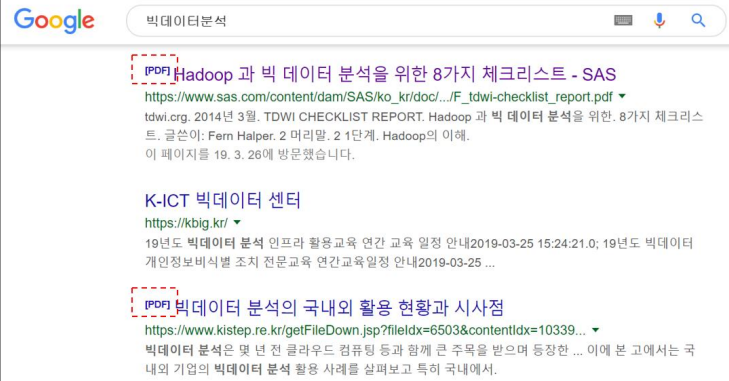
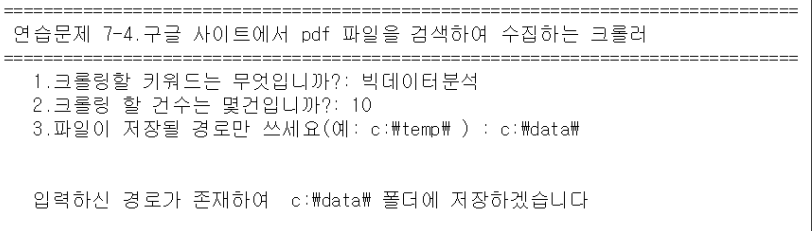
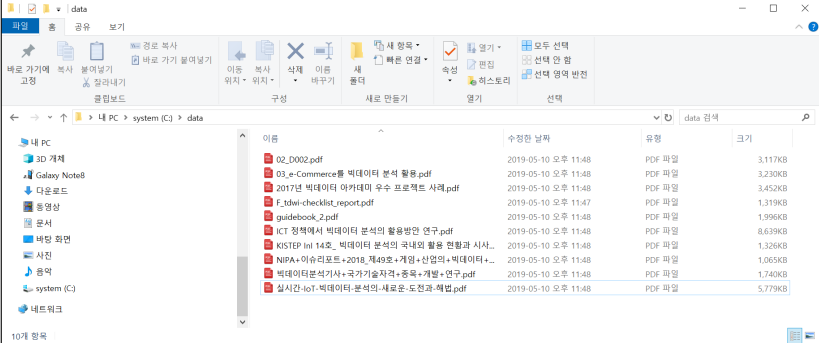

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import sys
import re
import math
import os
import random
import ssl

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [ ]:
def scroll_down(driver, height):
    driver.execute_script("window.scrollTo(0,%d);" % height)
    time.sleep(1)

In [ ]:
print("=" *100)
print("연습문제 7-4. 구글 사이트에서 pdf 파일을 검색하여 수집하는 크롤러")
print("=" *100)

keyword = '빅데이터분석'#input("1. 클롤링할 키워드는 무엇입니까? ")
num = 100#int(input("2. 수집할 데이터 건수는 몇건입니까? "))
save_path = 'C:/WorkSpace/Research/crawling/exam/data/file_data/'#input("3. 파일이 저장될 경로는 어디입니까? (예: c:\\temp\\) ")

if not os.path.exists(save_path):
    os.makedirs(save_path)
    print("폴더가 존재하지 않아 새로 생성하였습니다.")
else:
    print(f"입력하신 경로가 존재하여 {save_path} 폴더에 저장하겠습니다.")

chrome_options = Options()
chrome_options.add_experimental_option("detach", True)
driver = webdriver.Chrome(options=chrome_options)
driver.implicitly_wait(3)

s_time = time.time( ) 

driver.get("https://google.com")

element = driver.find_element(By.CLASS_NAME, 'gLFyf')

# element.click()

element.send_keys(keyword + " filetype:pdf")

element.send_keys(Keys.ENTER)

time.sleep(1)

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

context = ssl._create_unverified_context()

i = 0
error = 0
while True:
    scroll_down(driver, 200 * i)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    pdf_src = soup.select('div.MjjYud>div>div>div>div>div>span>a')
    pdf_url = pdf_src[i]['href']
    
    
    print(pdf_url)
    
    
    
    if i > 40 and i % 8 == 0:
        driver.find_element(By.CLASS_NAME, 'RVQdVd').click()
        time.sleep(1)
    
    
    try:
        # 요청을 통해 응답 얻기
        response = requests.get(pdf_url, headers=headers, verify=True, timeout=50)
        
        with open(save_path + pdf_src[i].find('h3').text.replace("?", "").replace(">", "").replace("<", "").replace("*", "") + ".pdf", 'wb') as file:
            file.write(response.content)
        
        print(f"{i-error}. {pdf_src[i].find('h3').text.replace('?', '')} 파일 저장 완료")
        
    except Exception as e:
        print(f"기타 오류 발생: {e}")
        error += 1
    i += 1
    if (i - error) == num:
        break

driver.close()